In [1]:
import torch
import os
import tiktoken
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F

device = 'mps'

In [2]:
torch.__version__

'2.2.0.dev20231129'

In [3]:
text_dir = "maildir"
out_file = "data/all.txt"
os.makedirs('data', exist_ok=True)

with open(out_file, 'w+') as out_f:
    for employee in tqdm(sorted(os.listdir(text_dir))):
        path = os.path.join(text_dir, employee, "all_documents")
        if not os.path.exists(path):
            print(f"could not read all_documents for {employee}, trying inbox...")
            path = os.path.join(text_dir, employee, "inbox")
            if not os.path.exists(path):
                continue
        for fname in os.listdir(path):
            try:
                with open(os.path.join(path, fname), "r") as in_f:
                    out_f.write(in_f.read())
            except Exception as e:
                pass

  2%|▊                                          | 3/151 [00:00<00:08, 17.13it/s]

could not read all_documents for .DS_Store, trying inbox...


  6%|██▌                                        | 9/151 [00:00<00:16,  8.68it/s]

could not read all_documents for blair-l, trying inbox...


 11%|████▋                                     | 17/151 [00:01<00:09, 14.68it/s]

could not read all_documents for causholli-m, trying inbox...
could not read all_documents for crandell-s, trying inbox...


 20%|████████▎                                 | 30/151 [00:03<00:11, 10.11it/s]

could not read all_documents for donoho-l, trying inbox...


 23%|█████████▋                                | 35/151 [00:03<00:12,  9.12it/s]

could not read all_documents for forney-j, trying inbox...
could not read all_documents for gang-l, trying inbox...
could not read all_documents for geaccone-t, trying inbox...


 33%|█████████████▉                            | 50/151 [00:05<00:09, 10.90it/s]

could not read all_documents for harris-s, trying inbox...
could not read all_documents for holst-k, trying inbox...


 35%|██████████████▋                           | 53/151 [00:05<00:07, 13.13it/s]

could not read all_documents for hyatt-k, trying inbox...


 42%|█████████████████▊                        | 64/151 [00:08<00:15,  5.63it/s]

could not read all_documents for keiser-k, trying inbox...
could not read all_documents for kitchen-l, trying inbox...


 48%|████████████████████                      | 72/151 [00:09<00:09,  8.14it/s]

could not read all_documents for lokey-t, trying inbox...
could not read all_documents for lucci-p, trying inbox...


 52%|█████████████████████▋                    | 78/151 [00:10<00:09,  7.38it/s]

could not read all_documents for mccarty-d, trying inbox...
could not read all_documents for mckay-j, trying inbox...


 54%|██████████████████████▊                   | 82/151 [00:10<00:06, 10.43it/s]

could not read all_documents for meyers-a, trying inbox...
could not read all_documents for motley-m, trying inbox...


 58%|████████████████████████▏                 | 87/151 [00:11<00:06,  9.23it/s]

could not read all_documents for parks-j, trying inbox...


 66%|███████████████████████████▌              | 99/151 [00:11<00:03, 17.21it/s]

could not read all_documents for phanis-s, trying inbox...
could not read all_documents for platter-p, trying inbox...
could not read all_documents for quigley-d, trying inbox...
could not read all_documents for rapp-b, trying inbox...
could not read all_documents for reitmeyer-j, trying inbox...
could not read all_documents for richey-c, trying inbox...
could not read all_documents for ring-r, trying inbox...


 71%|█████████████████████████████            | 107/151 [00:12<00:02, 15.12it/s]

could not read all_documents for salisbury-h, trying inbox...


 73%|█████████████████████████████▊           | 110/151 [00:13<00:03, 11.02it/s]

could not read all_documents for scholtes-d, trying inbox...
could not read all_documents for schoolcraft-d, trying inbox...


 75%|██████████████████████████████▉          | 114/151 [00:13<00:03, 12.27it/s]

could not read all_documents for semperger-c, trying inbox...


 79%|████████████████████████████████▌        | 120/151 [00:14<00:04,  7.39it/s]

could not read all_documents for slinger-r, trying inbox...
could not read all_documents for solberg-g, trying inbox...
could not read all_documents for staab-t, trying inbox...


 87%|███████████████████████████████████▊     | 132/151 [00:15<00:01, 17.09it/s]

could not read all_documents for steffes-j, trying inbox...
could not read all_documents for stokley-c, trying inbox...
could not read all_documents for swerzbin-m, trying inbox...


 93%|██████████████████████████████████████   | 140/151 [00:16<00:01, 10.69it/s]

could not read all_documents for thomas-p, trying inbox...
could not read all_documents for watson-k, trying inbox...


100%|█████████████████████████████████████████| 151/151 [00:16<00:00,  9.09it/s]

could not read all_documents for whitt-m, trying inbox...
could not read all_documents for williams-w3, trying inbox...


In [3]:
out_file = "data/all.txt"

with open(out_file, 'r') as data_f:
    text = data_f.read()

print(text[:600])
print(len(text))

Message-ID: <5161987.1075855666285.JavaMail.evans@thyme>
Date: Tue, 12 Dec 2000 05:27:00 -0800 (PST)
From: jsmith@austintx.com
To: phillip.k.allen@enron.com
Subject: RE: stage coach
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: "Jeff Smith" <jsmith@austintx.com>
X-To: <Phillip.K.Allen@enron.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

Phillip,

I am completing my marketing package for the Stage.  I also need the 1999
statement and a rent roll.  Please send ASAP.

352202027


In [4]:
enc = tiktoken.get_encoding('r50k_base')
encoded = enc.encode(text)
print(len(encoded))
print(encoded[:100])

122526421
[12837, 12, 2389, 25, 1279, 47493, 27301, 13, 940, 38569, 2816, 27310, 26279, 13, 29584, 25804, 13, 1990, 504, 31, 20057, 1326, 29, 198, 10430, 25, 30030, 11, 1105, 4280, 4751, 8870, 25, 1983, 25, 405, 532, 2919, 405, 357, 47, 2257, 8, 198, 4863, 25, 474, 21453, 31, 64, 436, 600, 87, 13, 785, 198, 2514, 25, 872, 359, 541, 13, 74, 13, 439, 268, 31, 268, 1313, 13, 785, 198, 19776, 25, 4526, 25, 3800, 3985, 198, 44, 524, 12, 14815, 25, 352, 13, 15, 198, 19746, 12, 6030, 25, 2420, 14, 25638, 26, 34534, 316, 28, 385]


In [5]:
data = torch.tensor(encoded, dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
dev_data = data[n:]
print(f"Train: {len(train_data)}, Dev: {len(dev_data)}")

Train: 110273778, Dev: 12252643


In [6]:
torch.manual_seed(1)

context_length = 128
batch_size = 8

def get_batch(split, batch_size=batch_size):
    data = train_data if split == 'train' else dev_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x = x.to(device)
    y = y.to(device)
    return x, y

get_batch('train')[0].shape

torch.Size([8, 128])

In [7]:
# head_size = 16
import math

torch.manual_seed(1)
n_head = 4


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(n_embed, 4*n_embed)
        self.relu = nn.ReLU()
        self.proj = nn.Linear(4*n_embed, n_embed)

    def forward(self, x):
        x = self.forward_embedding(x)
        x = self.project_embedding(x)
        return x

    def forward_embedding(self, x):
        x = self.relu(self.hidden(x))
        return x

    def project_embedding(self, x):
        x = self.proj(x)
        return x
        

class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length)))

    def forward(self, x):
        # out = nn.scaled_dot_product_attention(self.key, self.query, self.value, causal=True)
        # return out

        B, T, C = x.shape
        k = self.key(x)
        q = self.query(x)
        scale_factor = 1 / math.sqrt(C)
        attn_weights = q @ k.transpose(-2, -1) * scale_factor
        attn_weights = attn_weights.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attn_weights = F.softmax(attn_weights, dim=-1)
        v = self.value(x)
        out = attn_weights @ v
        return out
        
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.heads = nn.ModuleList([Head(n_embed//n_head) for _ in range(n_head)])

    def forward(self, x):
        x = torch.cat([h(x) for h in self.heads], dim=-1)
        return x

class Block(nn.Module):
    def __init__(self):
        super().__init__()
        self.ln1 = nn.LayerNorm(n_embed)
        self.attn = MultiHeadAttention()
        self.ln2 = nn.LayerNorm(n_embed)
        self.mlp = MLP()

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        # x = x + self.attn(x)
        # x = x + self.mlp(x)
        return x

    def forward_ablation(self, x, autoencoder):
        x, res = self.forward_embedding(x)
        x, _, _ = autoencoder(x)
        x = res + self.mlp.project_embedding(x)
        return x

    def forward_embedding(self, x):
        res = x + self.attn(self.ln1(x))
        x = self.mlp.forward_embedding(self.ln2(res))
        return x, res

    # def project_embedding(self, x, residual):
    #     x = self.mlp.project_embedding(x)
    #     x = x + residual
    #     return x
        

In [8]:
import torch.nn as nn
import torch.nn.functional as F

vocab_size = 50304
n_embed = 128

class Transformer(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embed = nn.Embedding(vocab_size, n_embed)
        self.position_embed = nn.Embedding(context_length, n_embed)
        self.attn_block = Block()
        self.layer_norm = nn.LayerNorm(n_embed)
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def _pre_attn_pass(self, idx):
        B, T = idx.shape
        tok_embedding = self.token_embed(idx)
        pos_embedding = self.position_embed(torch.arange(T, device=device))
        return tok_embedding + pos_embedding

    def forward(self, idx, targets=None):
        x = self._pre_attn_pass(idx)
        x = self.attn_block(x)
        x = self.layer_norm(x)
        logits = self.lm_head(x)
        loss = None
        if targets is not None:
            B, T, C = logits.shape
            flat_logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(flat_logits, targets)
        return logits, loss

    def forward_embedding(self, idx):
        x = self._pre_attn_pass(idx)
        x, residual = self.attn_block.forward_embedding(x)
        return x, residual

    def forward_ablation(self, idx, autoencoder, targets=None):
        x = self._pre_attn_pass(idx)
        x = self.attn_block.forward_ablation(x, autoencoder)
        x = self.layer_norm(x)
        logits = self.lm_head(x)
        loss = None
        if targets is not None:
            B, T, C = logits.shape
            flat_logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(flat_logits, targets)
        return logits, loss

        
        # x, residual = self.forward_embedding(idx)
        # # x, _, _ = autoencoder(x)
        # x = self.attn_block.project_embedding(x, residual)
        # x = self.layer_norm(x)
        # logits = self.lm_head(x)
        return logits

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -context_length:]
            logits, _ = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

    def generate_ablation(self, idx, max_new_tokens, autoencoder):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -context_length:]
            logits, _ = self.forward_ablation(idx_cond, autoencoder)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx


In [9]:
def count_params(m):
    print(sum(p.numel() for p in m.parameters()))

In [10]:
model = Transformer()
model = model.to(device)
print(model)
count_params(model)

Transformer(
  (token_embed): Embedding(50304, 128)
  (position_embed): Embedding(128, 128)
  (attn_block): Block(
    (ln1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (attn): MultiHeadAttention(
      (heads): ModuleList(
        (0-3): 4 x Head(
          (key): Linear(in_features=128, out_features=32, bias=False)
          (query): Linear(in_features=128, out_features=32, bias=False)
          (value): Linear(in_features=128, out_features=32, bias=False)
        )
      )
    )
    (ln2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (mlp): MLP(
      (hidden): Linear(in_features=128, out_features=512, bias=True)
      (relu): ReLU()
      (proj): Linear(in_features=512, out_features=128, bias=True)
    )
  )
  (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (lm_head): Linear(in_features=128, out_features=50304, bias=True)
)
13126144


In [427]:
eval_iters = 20

@torch.no_grad()
def estimate_loss(steps=eval_iters):
    out = {}
    model.eval()
    for split in ['train', 'dev']:
        losses = torch.zeros(steps)
        for k in tqdm(range(steps)):
            xb, yb = get_batch(split)
            logist, loss = model(xb, yb)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [428]:
estimate_loss()

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 74.90it/s]


{'train': tensor(11.0028), 'dev': tensor(11.0048)}

In [665]:
xb, _ = get_batch('train', 2048)
with torch.no_grad():
    model.eval()
    x = model.forward_embedding(xb)
    model.train()
x.shape

torch.Size([2048, 128, 128])

In [666]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
losses = []

Train loss: 2.4535: 100%|█████████████████| 10000/10000 [14:26<00:00, 11.54it/s]


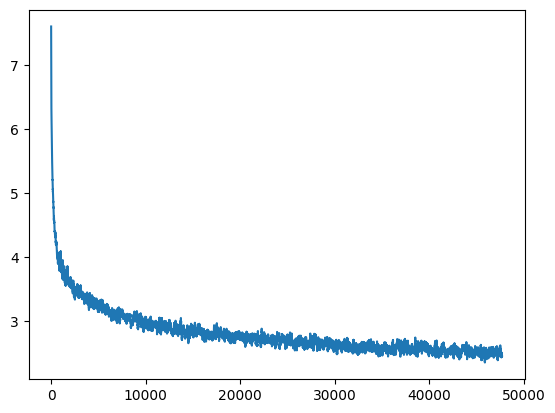

100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 66.51it/s]


{'train': tensor(2.5512), 'dev': tensor(2.9458)}

In [688]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

optimizer.lr = 1e-4
batch_size = 16
n_steps = 10000
avg_window = 64

pbar = tqdm(range(n_steps))
for steps in pbar:
    xb, yb = get_batch('train', batch_size)
    logits, loss = model(xb, yb)
    losses.append(loss.item())
    pbar.set_description(f"Train loss: {np.mean(losses[-avg_window:]):.4f}")
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plt.plot(moving_average(losses, avg_window))
plt.show()
estimate_loss(200)

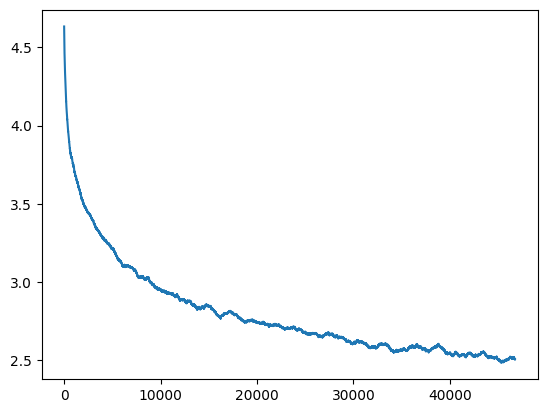

In [689]:
plt.plot(moving_average(losses, 1000))

In [692]:
train_loss, dev_loss = estimate_loss(1000).values()
train_loss

100%|███████████████████████████████████████| 1000/1000 [00:13<00:00, 73.87it/s]


tensor(2.4868)

In [12]:
path = f"models/transformer_128_0_2.963.pt"

In [21]:
os.makedirs('models', exist_ok=True)

if not os.path.exists(path):
    torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'losses': losses,
                'train_loss': train_loss,
                'dev_loss': dev_loss,
                # 'steps': len(losses),
                }, path)

dddd


In [13]:
checkpoint = torch.load(path)
model = Transformer().to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [14]:
idx = torch.tensor(enc.encode('Date:'), dtype=torch.long)[None, :].to(device)
torch.manual_seed(1)
with torch.no_grad():
    print(enc.decode(model.generate(idx, 256)[0].tolist()))

Date: Thu, 12 Apr 2001 02:59:15 -0700 (PDT)
From: phillip.allen@enron.com
To: tori.kuykendall@enron.com, richard.ring@enron.com, 
	jpblay.zipper@enron.com, david.ryan@enron.com, 
	drew.thuraisingham@enron.com, marilyn.toe@att.com, pat.radford@enron.com
Subject: ClickPaper-summary Study for Interview


Good morning.
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Matthew Lenhart
X-To: karen J Farmer
X-cc: 
X-bcc: 
X-Folder: \Darren_Farmer_Dec2000\Notes Folders\All documents
X-Origin: Farmer-D
X-FileName: dfarmer.nsf

The language which wasn crazy as or Reliant of Ben
West, if Fav


In [15]:
class SparseAutoencoder(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.encoder = nn.Linear(n_embed * 4, n_features)
        self.decoder = nn.Linear(n_features, n_embed * 4)
        # self.decoder_bias = nn.Parameter(torch.zeros(n_embed * 4))  # explicitly define decoder bias so we can subtract it from the input
        self.relu = nn.ReLU()

    def forward(self, x_in, compute_loss=False):
        f = self.encode(x_in)
        x = self.decoder(f)
        if compute_loss:
            recon_loss = F.mse_loss(x, x_in)
            reg_loss = f.abs().sum(dim=-1).mean()
            loss = recon_loss + reg_loss
        else:
            recon_loss = None
            reg_loss = None
        return x, recon_loss, reg_loss

    def encode(self, x_in):
        x = x_in - self.decoder.bias
        f = self.relu(self.encoder(x))
        return f

    def normalize_decoder_weights(self):
        with torch.no_grad():
            self.decoder.weight.data = nn.functional.normalize(self.decoder.weight.data, p=2, dim=1)

In [274]:
batch_size = 256

num_batches = len(train_data)

def iterate_data(split, batch_size=batch_size):
    data = train_data if split == 'train' else dev_data
    rows = data[:len(data) - len(data) % (context_length*batch_size)].view(-1, batch_size, context_length)
    print(f"batches: {rows.shape[0]}")
    for batch in rows:
        yield batch

batch_iterator = iterate_data('train')

In [265]:
import h5py

hdf5_path = 'data/embeddings_0.hdf5'

with h5py.File(hdf5_path, 'w') as hdf5_file:
    with torch.no_grad():
        maxshape = (None, n_embed*4)
        dataset = hdf5_file.create_dataset('tensors', (0, n_embed*4), maxshape=maxshape, dtype='float32')
        
        for batch in tqdm(batch_iterator):
            embedding = model.forward_embedding(batch.to(device))
            flattened_embedding = embedding.view(-1, n_embed*4)
    
            # Append the flattened tensor to the HDF5 dataset
            dataset.resize((dataset.shape[0] + flattened_embedding.shape[0]), axis=0)
            dataset[-flattened_embedding.shape[0]:] = flattened_embedding.cpu().numpy()


OSError: Unable to create file (unable to truncate a file which is already open)

In [20]:
import numpy as np

batch_size = 128

def iterate_embeddings(batch_size):
    with h5py.File(hdf5_path, 'r') as hdf5_file:
        while True:
            dataset = hdf5_file['tensors']
            dataset_size = dataset.shape[0]
            random_indices = torch.randint(dataset_size, size=(batch_size,))
            random_samples = torch.tensor(np.array([dataset[idx] for idx in random_indices]))
            yield random_samples

embedding_iterator = iterate_embeddings(batch_size)

In [86]:
next(embedding_iterator).shape

torch.Size([128, 512])

In [16]:
autoencoder = SparseAutoencoder(4096).to(device)
count_params(autoencoder)
autoencoder

4198912


SparseAutoencoder(
  (encoder): Linear(in_features=512, out_features=4096, bias=True)
  (decoder): Linear(in_features=4096, out_features=512, bias=True)
  (relu): ReLU()
)

In [18]:
train_steps = 20000
lambda_reg = 0.002
batch_size = 128
lr = 1e-5

autoencoder = SparseAutoencoder(4096).to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=lr)
losses = []
recon_losses = []
reg_losses = []

0.053: 100%|██████████████████████████████| 20000/20000 [34:12<00:00,  9.74it/s]


Loss:	0.071
Recon:	0.051
Reg:	0.020


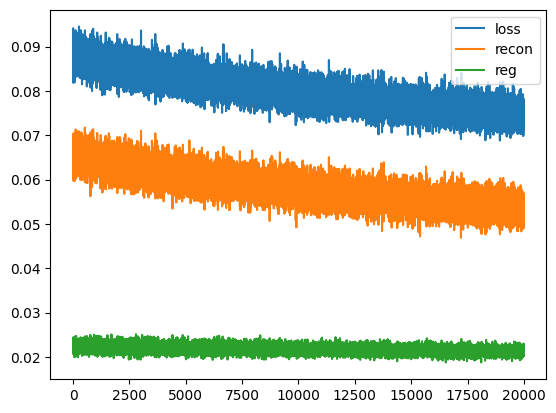

In [40]:
import matplotlib.pyplot as plt
import h5py
hdf5_path = 'data/embeddings_0.hdf5'

batch_size = 128
losses = []
recon_losses = []
reg_losses = []
embedding_iterator = iterate_embeddings(batch_size)

pbar = tqdm(range(train_steps))

for _ in pbar:
    xb, _ = get_batch('train', batch_size)
    # with torch.no_grad():
    #     x_embedding = model.forward_embedding(xb)
    #     print(x_embedding.shape)
    # break
    x_embedding = next(embedding_iterator).to(device)
    optimizer.zero_grad()
    outputs, recon_loss, reg_loss = autoencoder(x_embedding, compute_loss=True)
    reg_loss = lambda_reg * reg_loss
    loss = recon_loss + reg_loss
    loss.backward()
    optimizer.step()
    autoencoder.normalize_decoder_weights()
    
    losses.append(loss.item())
    recon_losses.append(recon_loss.item())
    reg_losses.append(reg_loss.item())

    pbar.set_description(f"{np.mean(recon_losses[-100:]):.3f}")

print(f"Loss:\t{loss:.3f}\nRecon:\t{recon_loss:.3f}\nReg:\t{reg_loss:.3f}")
plt.plot(losses, label='loss')
plt.plot(recon_losses, label='recon')
plt.plot(reg_losses, label='reg')
plt.legend()
plt.show()

In [55]:
path = "models/autoencoder_1.pt"

os.makedirs('models', exist_ok=True)

if not os.path.exists(path):
    torch.save({
                'model_state_dict': autoencoder.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'losses': losses,
                'steps': len(losses),
                }, path)

In [39]:
path = "models/autoencoder_1.pt"

checkpoint = torch.load(path)
autoencoder.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [43]:
identity = lambda x: (x, None, None)
idx = torch.tensor(enc.encode('\n'), dtype=torch.long)[None, :].to(device)
# torch.manual_seed(1)
with torch.no_grad():
    print(enc.decode(model.generate_ablation(idx, 128, autoencoder)[0].tolist()))


S Smith, Gary N NTT/HOU/ECT@ECT, Alan Aronowitz, Susan 
	 
	catalog/HOU/ECT@EES, gdan.har@enron.com, 
	marcelise.liss, Clayton.mull@enron.com, kourtney@enron.com, mark.malzman@enron.com, tom.del@enron.com, 
	john.mull@enron.com, james.lbas@enron.com, kevin.dro@enron.


100%|█████████████████████████████████████████| 160/160 [00:59<00:00,  2.68it/s]


0.9375


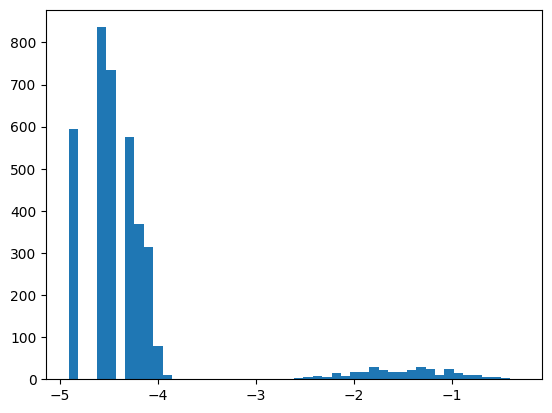

In [44]:
batch_size = 512
embedding_iterator = iterate_embeddings(batch_size)

def feature_density_histogram(num_samples=16384):
    all_outputs = []
    for i in tqdm(range(num_samples // batch_size)):
        batch = next(embedding_iterator).to(device)
        outputs = autoencoder.encode(batch)  # (128, 4096)
        all_outputs.append(outputs)
    output_stack = torch.concat(all_outputs)
    return output_stack

output_stack = feature_density_histogram(16384*5)

B, C = output_stack.shape
activation_densities = (output_stack > 1e-4).to(torch.float32).mean(dim=0)
activation_densities = activation_densities[activation_densities > 0]
activation_densities = activation_densities.log10()
print(activation_densities.shape[0]/4096)
plt.hist(activation_densities.cpu(), bins=48)
plt.show()

# We want nearly all features to be below 1% density: "The number of features with density above 1%. A significant number of features above this level seems to correspond to an L1 coefficient that is too low."

In [54]:
(activation_densities > -1).sum()

tensor(56, device='mps:0')

In [45]:
print(f"{(((output_stack > 1e-4).to(torch.float32).mean(dim=0) > 0).sum().item() / 4096 * 100):.2f}%")

93.75%


In [46]:
batch_size = 4096
embedding_iterator = iterate_embeddings(batch_size)
x_embedding = next(embedding_iterator).to(device)

activation_counts = (autoencoder.encode(x_embedding) > 1e-3 * 1.0).sum(dim=-1).to(torch.float32)
print(f"Median:\t{activation_counts.median().item()}\nMean:\t{activation_counts.mean().item():.2f}\nStd:\t{activation_counts.std().item():.2f}")
# median number of hot features per token for each element in the batch, want to be "less than 10 or 20" as per paper

# "we generally target a L^0 norm that is less than 10 or 20. We especially distrust solutions where the L^0 norm is a significant fraction of the transformer’s activation dimensionality.

Median:	18.0
Mean:	18.94
Std:	7.17


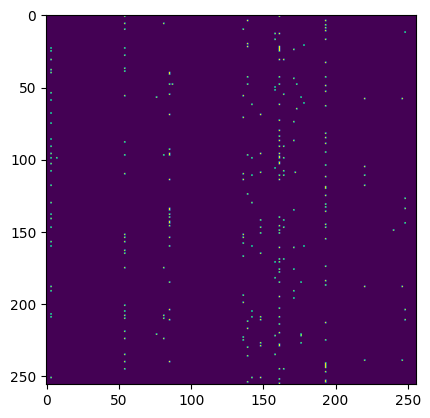

In [47]:
with torch.no_grad():
    out = autoencoder.encode(x_embedding) > 1e-3
B, C = out.shape
plt.imshow(out.cpu()[:256, :256])

In [1152]:
# print(autoencoder(x))
for vec in x_embedding:
    hot = ((autoencoder.encode(vec) > 1e-4) * 1).sum(dim=1)
    print(hot.sum())

tensor(679, device='mps:0')
tensor(685, device='mps:0')
tensor(619, device='mps:0')
tensor(551, device='mps:0')
tensor(606, device='mps:0')
tensor(631, device='mps:0')
tensor(496, device='mps:0')
tensor(634, device='mps:0')
tensor(540, device='mps:0')
tensor(517, device='mps:0')
tensor(495, device='mps:0')
tensor(579, device='mps:0')
tensor(587, device='mps:0')
tensor(579, device='mps:0')
tensor(580, device='mps:0')
tensor(730, device='mps:0')
tensor(677, device='mps:0')
tensor(537, device='mps:0')
tensor(599, device='mps:0')
tensor(476, device='mps:0')
tensor(774, device='mps:0')
tensor(541, device='mps:0')
tensor(527, device='mps:0')
tensor(482, device='mps:0')
tensor(531, device='mps:0')
tensor(457, device='mps:0')
tensor(566, device='mps:0')
tensor(508, device='mps:0')
tensor(500, device='mps:0')
tensor(483, device='mps:0')
tensor(519, device='mps:0')
tensor(537, device='mps:0')
tensor(531, device='mps:0')
tensor(545, device='mps:0')
tensor(446, device='mps:0')
tensor(548, device='

In [476]:
!git a && git c 'add function to forward pass transformer using autoencoder for MLP activations'

[main 81e9b8e] add function to forward pass transformer using autoencoder for MLP activations
 1 file changed, 240 insertions(+), 204 deletions(-)


In [35]:
xb, yb = get_batch('train', 64)
print(xb.shape)

with torch.no_grad():
    t_logits, t_loss = model(xb, yb)
    a_logits, a_loss = model.forward_ablation(xb, autoencoder, yb)

print(t_loss, a_loss)

torch.Size([64, 128])
tensor(2.5114, device='mps:0') tensor(3.3334, device='mps:0')


In [63]:
def get_features(x):
    embedding, _ = model.forward_embedding(x)
    features = autoencoder.encode(embedding)
    return features

features = get_features(xb)

print(features.shape, xb.shape)

torch.Size([128, 128, 4096]) torch.Size([128, 128])


In [200]:
feature_dict = {i: [0, []] for i in range(4096)}
context_list = []

threashold = 1

num_iters = 32000
batch_size = 16
samples_per_row = 4

for _ in tqdm(range(num_iters)):
    xb, _ = get_batch("train", batch_size)
    features = get_features(xb)
    features = features.cpu()
    for i, row in enumerate(xb):  # iterate thru rows in a batch
        # for j in range(row.shape[0]):  # iterate thru tokens in a row
        for j in np.random.choice(row.shape[0], samples_per_row, replace=False):  #torch.randint(row.shape[0], (samples_per_row,), replact=False):
            token = xb[i, j]
            context = xb[i, max(j-4, 0):j+5]
            context_list.append((token.item(), context.tolist()))
            context_idx = len(context_list) - 1
            
            feature_vec = features[i, j]
            activation_idxs = (feature_vec > threashold).nonzero()
            
            for a_idx in activation_idxs:
                a_idx = a_idx[0].item()
                feature_dict[a_idx][0] += 1
                if feature_dict[a_idx][0] < 512:
                    feature_dict[a_idx][1].append((context_idx, feature_vec[a_idx].item()))



 25%|█████████▎                            | 7855/32000 [02:47<08:34, 46.89it/s]


KeyboardInterrupt: 

In [201]:
sum([len(l[1]) > 1 for l in feature_dict.values()])

329

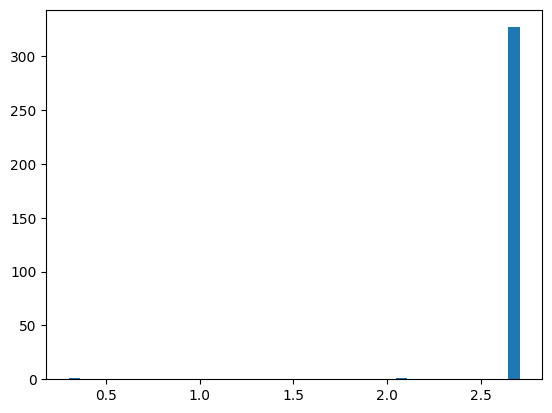

In [202]:
plt.hist([math.log10(len(ctx[1])) for ctx in feature_dict.values() if len(ctx[1]) > 0], bins=40)
plt.show()

In [211]:
repr("aa\n")

"'aa\\n'"

In [214]:
a = 0

for feat_idx, info in feature_dict.items():
    a += 1
    if a >= 1000:
        break
    count = info[0]
    ctxs = sorted(info[1], key=lambda x: x[1], reverse=True)
    print(f"Feature idx:\t{feat_idx}\nCount:\t\t{count}")
    for context_idx, feature_activation in ctxs[:10]:
        token = enc.decode([context_list[context_idx][0]])
        context = enc.decode(context_list[context_idx][1])
        print(f'  Token: {repr(token)}\n  Context: {repr(context)}\n  Activation: {feature_activation:.3f}')
        print()

Feature idx:	0
Count:		0
Feature idx:	1
Count:		0
Feature idx:	2
Count:		0
Feature idx:	3
Count:		5400
  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.381

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.348

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.332

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.306

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.304

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.277

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.273

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.248

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.202

  Token: '0'
  Context: 'Version: 1.0\nContent-Type'
  Activation: 5.187

Feature idx:	4
Count:		0
Feature idx:	5
Count:		0
Feature idx:	6
Count:		0
Feature idx:	7
Count:		0
Feature idx:	8
Count:		0
Feature idx:	9
Count:		0
Feature

In [114]:
math.log10(0)

ValueError: math domain error

In [ ]:
!git a && git commit -m "beginnings of feature exploration